In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import sklearn.model_selection as ms

In [2]:
df = pd.read_csv("D:\#Zikoy\Semester 5\Introduction to Data Science\Meeting 11\possum.csv")

In [3]:
df = df.dropna()

In [4]:
df.head()

,rownames,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,C3,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,C5,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,C10,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,C15,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,C23,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [5]:
X = df.drop(['rownames','case','site','Pop','sex'],axis=1)
y = df['sex']

In [6]:
X

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...
99,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [7]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size=0.3, random_state=101)

In [8]:
#clf = DecisionTreeClassifier(random_state=1234, criterion='entropy')
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=101, splitter='best')
model = clf.fit(X_train, y_train)

In [9]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_5 <= 66.60
|   |--- feature_3 <= 85.75
|   |   |--- feature_5 <= 61.75
|   |   |   |--- class: f
|   |   |--- feature_5 >  61.75
|   |   |   |--- class: m
|   |--- feature_3 >  85.75
|   |   |--- feature_5 <= 65.45
|   |   |   |--- feature_5 <= 63.65
|   |   |   |   |--- class: f
|   |   |   |--- feature_5 >  63.65
|   |   |   |   |--- feature_7 <= 14.25
|   |   |   |   |   |--- class: f
|   |   |   |   |--- feature_7 >  14.25
|   |   |   |   |   |--- feature_6 <= 46.15
|   |   |   |   |   |   |--- class: m
|   |   |   |   |   |--- feature_6 >  46.15
|   |   |   |   |   |   |--- feature_3 <= 88.75
|   |   |   |   |   |   |   |--- class: f
|   |   |   |   |   |   |--- feature_3 >  88.75
|   |   |   |   |   |   |   |--- class: m
|   |   |--- feature_5 >  65.45
|   |   |   |--- class: m
|--- feature_5 >  66.60
|   |--- feature_2 <= 58.30
|   |   |--- feature_6 <= 53.95
|   |   |   |--- feature_9 <= 32.50
|   |   |   |   |--- feature_7 <= 14.30
|   |   |   |   |   |--- class: 

In [10]:
X.columns

Index(['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch',
       'eye', 'chest', 'belly'],
      dtype='object')

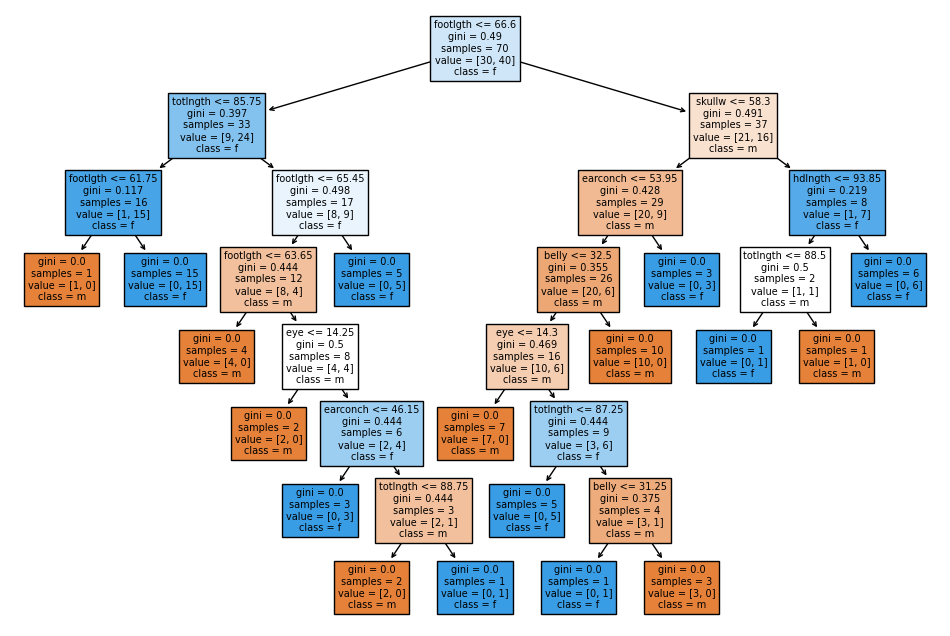

In [11]:
fig = plt.figure(figsize=(12,8))
_ = tree.plot_tree(clf, feature_names=list(X.keys()),  
                   class_names=list(df['sex'].unique()),
                   filled=True)

In [12]:
y_pred = model.predict(X_test)

In [13]:
import sklearn.metrics as met
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(met.accuracy_score(y_test,y_pred))

0.6774193548387096


In [15]:
print(confusion_matrix(y_test,y_pred))

[[ 6  6]
 [ 4 15]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           f       0.60      0.50      0.55        12
           m       0.71      0.79      0.75        19

    accuracy                           0.68        31
   macro avg       0.66      0.64      0.65        31
weighted avg       0.67      0.68      0.67        31



In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test,rfc_pred))

[[ 5  7]
 [ 4 15]]


In [20]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           f       0.56      0.42      0.48        12
           m       0.68      0.79      0.73        19

    accuracy                           0.65        31
   macro avg       0.62      0.60      0.60        31
weighted avg       0.63      0.65      0.63        31



In [21]:
rfc.feature_importances_

array([0.05868747, 0.09066441, 0.11936126, 0.10630574, 0.07248156,
       0.12302186, 0.12389928, 0.11593827, 0.08585279, 0.10378735])

In [22]:
importances = rfc.feature_importances_
columns = X.columns
i = 0
while i < len(columns):
    print(columns[i],'=',round(importances[i]*100,2),"%")
    i += 1

age = 5.87 %
hdlngth = 9.07 %
skullw = 11.94 %
totlngth = 10.63 %
taill = 7.25 %
footlgth = 12.3 %
earconch = 12.39 %
eye = 11.59 %
chest = 8.59 %
belly = 10.38 %
